In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Taste 0: Bad

Taste 1: Good

Odor 0: Bad

Odor 1: Good

Fat 0: Low

Fat 1: High

Turbidity 0: Low

Turbidity 1: High 

In [3]:
data = pd.read_csv("milkdata.csv")
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Since, all the features has no null values, we move for further analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [9]:
data['Grade'] = label_encoder.fit_transform(data['Grade'])
data
#0 for high
#1 for low
#2 for medium

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [10]:
data_corr = data.corr()
data_corr


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


<AxesSubplot:>

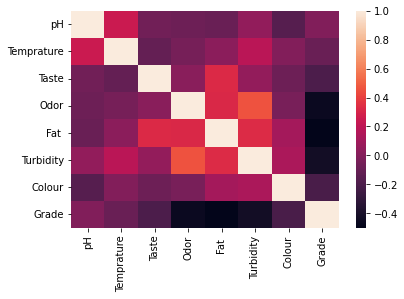

In [11]:
sn.heatmap(data_corr)

Checking the correlation between the numeric/continuous variable

Ignore the categorical variable correlation as it does not mean anything

### Feature Selection

In [12]:
x = data.iloc[:,:-1]
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [13]:
y = data.iloc[:,-1]
pd.DataFrame(y)

,Grade
0,0
1,0
2,1
3,1
4,2
...,...
1054,2
1055,0
1056,1
1057,0


# Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((847, 7), (212, 7), (847,), (212,))

In [17]:
from sklearn.metrics import r2_score, confusion_matrix

# Logistic Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [20]:
lr_model.fit(train_x, train_y)

LinearRegression()

In [21]:
y_predict_lr = lr_model.predict(test_x)
y_predict_lr_r = np.round(y_predict_lr)
df_lr = pd.DataFrame({'x':y_predict_lr_r,'y':test_y})
df_lr

,x,y
576,1.0,0
312,1.0,1
70,1.0,1
682,2.0,2
896,2.0,2
...,...,...
55,1.0,2
120,2.0,2
533,2.0,2
25,1.0,0


In [22]:
confusion_matrix(test_y, y_predict_lr_r)

array([[ 7, 41,  0],
       [ 4, 61, 13],
       [ 0, 35, 51]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
accuracy_score(test_y, y_predict_lr_r)


0.5613207547169812

#### K-Fold Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cvs_lr = cross_val_score(lr_model,x,y, cv=5)
cvs_lr;
cvs_lr.mean()

0.4183883609220369

# Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model

DecisionTreeClassifier()

In [29]:
decision_tree_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [30]:
y_predict_dt = decision_tree_model.predict(test_x)


In [31]:
y_train_predict_dt = decision_tree_model.predict(train_x)

In [32]:
r2_score(test_y,y_predict_dt)

0.9606883251743065

In [33]:
r2_score(train_y, y_train_predict_dt)

1.0

There is no over-fitting in the model, as the difference between the test and train score is nearly same

In [34]:
confusion_matrix(y_predict_dt,test_y)

array([[47,  1,  0],
       [ 0, 77,  0],
       [ 1,  0, 86]], dtype=int64)

In [35]:
accuracy_score(test_y, y_predict_dt)

0.9905660377358491

In [36]:
cvs_dt = cross_val_score(decision_tree_model, x, y)
cvs_dt

array([0.97641509, 1.        , 1.        , 1.        , 0.98578199])

# Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC(kernel='linear',C=1)
svm_model

SVC(C=1, kernel='linear')

In [39]:
svm_model.fit(train_x,train_y)

SVC(C=1, kernel='linear')

In [40]:
y_predict_svm = svm_model.predict(test_x)

In [41]:
r2_score(y_predict_svm,test_y)

0.46111569112393513

In [42]:
confusion_matrix(y_predict_svm,test_y)

array([[42, 10, 11],
       [ 3, 67,  4],
       [ 3,  1, 71]], dtype=int64)

In [43]:
accuracy_score(y_predict_svm, test_y)

0.8490566037735849

In [44]:
cvs_svm = cross_val_score(svm_model, x, y)
cvs_svm

array([0.86792453, 0.8490566 , 0.86792453, 0.81603774, 0.85781991])

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model

KNeighborsClassifier(n_neighbors=7)

In [47]:
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

In [48]:
y_predict_knn = knn_model.predict(test_x)

In [49]:
r2_score(y_predict_knn, test_y)

0.9535563020300861

In [50]:
confusion_matrix(y_predict_knn, test_y)

array([[48,  0,  1],
       [ 0, 76,  0],
       [ 0,  2, 85]], dtype=int64)

In [51]:
accuracy_score(y_predict_knn, test_y)

0.9858490566037735

In [52]:
cvs_knn = cross_val_score(knn_model, x, y)
cvs_knn

array([0.98584906, 1.        , 0.99056604, 1.        , 0.97630332])

# Naive Baise

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb_model = GaussianNB()
nb_model

GaussianNB()

In [55]:
nb_model.fit(train_x, train_y)

GaussianNB()

In [56]:
y_predict_nb = nb_model.predict(test_x)

In [57]:
r2_score(y_predict_nb, test_y)

0.7362090418913314

In [58]:
confusion_matrix(y_predict_nb, test_y)

array([[48,  4,  8],
       [ 0, 74,  0],
       [ 0,  0, 78]], dtype=int64)

In [59]:
accuracy_score(y_predict_nb, test_y)

0.9433962264150944

In [60]:
cvs_nb = cross_val_score(nb_model, x, y)
cvs_nb

array([0.8254717 , 0.94339623, 0.91981132, 0.93867925, 0.96208531])

In [61]:
#Linear Regression
confusion_matrix(test_y, y_predict_lr_r)

array([[ 7, 41,  0],
       [ 4, 61, 13],
       [ 0, 35, 51]], dtype=int64)

In [62]:
#Decision Tree
confusion_matrix(y_predict_dt,test_y)

array([[47,  1,  0],
       [ 0, 77,  0],
       [ 1,  0, 86]], dtype=int64)

In [63]:
#Support Vector Machine
confusion_matrix(y_predict_svm,test_y)

array([[42, 10, 11],
       [ 3, 67,  4],
       [ 3,  1, 71]], dtype=int64)

In [64]:
#KNN
confusion_matrix(y_predict_knn, test_y)

array([[48,  0,  1],
       [ 0, 76,  0],
       [ 0,  2, 85]], dtype=int64)

In [65]:
#Naive Baise
confusion_matrix(y_predict_nb, test_y)

array([[48,  4,  8],
       [ 0, 74,  0],
       [ 0,  0, 78]], dtype=int64)

In [66]:
import pickle

file = "model.pkl"
fileobj = open(file, 'wb')
pickle.dump(decision_tree_model, fileobj)
fileobj.close()

In [67]:
fileobj = open(file, 'rb')
model = pickle.load(fileobj)


### Checking the pickle file output using variable

##### High=0, Low=1, Medium=2

In [68]:
input = np.array([[8.6,55,0,1,1,1,255]])
x = model.predict(input)
print(x)

[1]
